In [7]:
import matplotlib.pyplot as plt

In [11]:
filename = "residuals_output.txt"
residuals_by_n = {}
current_n = None

In [12]:
with open(filename, "r") as f:
    for line in f:
        line = line.strip()
        if line.startswith("Normalized residuals for n"):
            current_n = int(line.split('=')[1].strip(': '))
            residuals_by_n[current_n] = []
        elif line and ',' in line:
            k, val = line.split(',')
            residuals_by_n[current_n].append((int(k), float(val)))

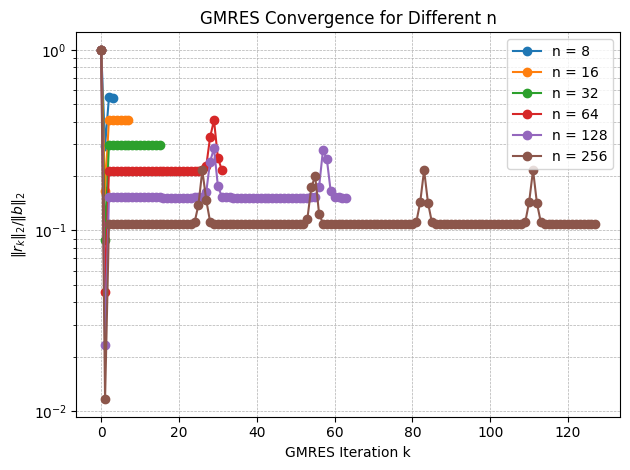

In [13]:
plt.figure()
for n, data in residuals_by_n.items():
    ks, residuals = zip(*data)
    plt.semilogy(ks, residuals, label=f"n = {n}", marker='o')

plt.xlabel("GMRES Iteration k")
plt.ylabel(r"$\|r_k\|_2 / \|b\|_2$")
plt.title("GMRES Convergence for Different n")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()